In [1]:
from dirty_cat.datasets import fetch_employee_salaries
import pandas as pd 
import pandas_profiling
from dirty_cat import GapEncoder


In [2]:
employee_salaries = fetch_employee_salaries()

In [3]:
df = employee_salaries['data']

In [4]:
df.head(10)

,full_name,gender,2016_gross_pay_received,2016_overtime_pay,department,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired,Current Annual Salary
0,"Aarhus, Pam J.",F,71225.98,416.10,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,None,09/22/1986,1986.0,69222.18
1,"Aaron, David J.",M,103088.48,3326.19,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,None,09/12/1988,1988.0,97392.47
2,"Aaron, Marsha M.",F,107000.24,1353.32,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,None,11/19/1989,1989.0,104717.28
3,"Ababio, Godfred A.",M,57819.04,3423.07,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,None,05/05/2014,2014.0,52734.57
4,"Ababu, Essayas",M,95815.17,NaN,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,None,03/05/2007,2007.0,93396.00
5,"Abbamonte, Drew B.",M,80926.43,9111.09,POL,Department of Police,PSB 6th District Special Assignment Team,Fulltime-Regular,Police Officer III,None,07/16/2007,2007.0,70435.00
6,"Abdalla, Eiman M.",F,27820.02,NaN,FRS,Fire and Rescue Services,EMS Billing,Fulltime-Regular,Accountant/Auditor II,None,06/27/2016,2016.0,60300.00
7,"Abdelmoniem, Marwan M.",M,62588.67,NaN,HHS,Department of Health and Human Services,Head Start,Fulltime-Regular,Administrative Specialist II,None,11/17/2014,2014.0,64788.65
8,"Abdool, Daniel Z.",M,NaN,NaN,FRS,Fire and Rescue Services,Recruit Training,Fulltime-Regular,Firefighter/Rescuer III,Firefighter/Rescuer I (Recruit),12/12/2016,2016.0,45261.00
9,"Abdul-Ghani, Hasinah J.",F,49336.12,275.03,POL,Department of Police,FSB Traffic Division Automated Traffic Enforce...,Fulltime-Regular,Police Aide,None,02/05/2007,2007.0,47670.09


In [5]:
X_dirty = df['employee_position_title']
X_dirty

0                     Office Services Coordinator
1                           Master Police Officer
2                                Social Worker IV
3                          Resident Supervisor II
4                         Planning Specialist III
                          ...                    
9223                    Community Health Nurse II
9224                   Fire/Rescue Division Chief
9225             Medical Doctor IV - Psychiatrist
9226                                   Manager II
9227    Alcohol/Tobacco Enforcement Specialist II
Name: employee_position_title, Length: 9228, dtype: object

In [6]:
enc = GapEncoder(n_components=10, random_state=0)

In [7]:
X_enc = enc.fit_transform(X_dirty)

In [8]:
topic_labels = enc.get_feature_names(n_labels=3)

In [9]:
for k in range(len(topic_labels)):
    labels = topic_labels[k]
    print(f'Topic n°{k}: {labels}')


Topic n°0: enforcement, equipment, engineer
Topic n°1: firefighter, rescuer, rescue
Topic n°2: community, correctional, security
Topic n°3: assistance, assistant, program
Topic n°4: officer, police, office
Topic n°5: administrative, legislative, administration
Topic n°6: manager, school, warehouse
Topic n°7: technology, information, technician
Topic n°8: services, sergeant, service
Topic n°9: operator, plumber, labor


In [10]:
X_dirty[X_dirty.str.lower().str.contains('manager')].unique()

array(['Manager II', 'Manager III', 'Liquor Store Assistant Manager',
       'Program Manager II', 'Program Manager I',
       'Community Outreach Manager', 'Liquor Store Manager',
       'Property Manager II',
       'Special Projects Manager, Office of the CAO', 'Nurse Manager',
       'Manager I', 'Program Manager - Sr II', 'Capital Projects Manager',
       'Financial Programs Manager',
       'Public Safety Emergency Communications Manager',
       'Insurance Fund Manager', 'Information Technology Project Manager',
       'Senior Pool Manager', 'Investment Portfolio Manager',
       'Food Service Manager', 'Property Manager I'], dtype=object)

In [11]:
X_dirty[X_dirty.str.lower().str.contains('therapist')].unique()

array(['Therapist II', 'Supervisory Therapist'], dtype=object)

In [12]:
X_dirty[X_dirty.str.lower().str.contains('enforcement')].unique()

array(['Alcohol/Tobacco Enforcement Specialist II',
       'Permitting and Code Enforcement Inspector III',
       'Traffic Enforcement Field Service Technician II',
       'Inspection and Enforcement Field Supervisor',
       'Code Enforcement Inspector III',
       'Permitting and Code Enforcement Inspector II',
       'Abandoned Vehicle Code Enforcement Specialist'], dtype=object)

In [13]:
X_dirty[X_dirty.str.lower().str.contains('equipment')].unique()

array(['Equipment Operator I', 'Equipment Operator II',
       'Equipment Maintenance Crew Chief', 'Warehouse Equipment Operator',
       'Equipment Services Coordinator',
       'Communications Equipment Technician II', 'Equipment Operator III',
       'Facilities and Equipment Maintenance Coordinator'], dtype=object)

In [14]:
X_dirty[X_dirty.str.lower().str.contains('engineer')].unique()

array(['Senior Engineer', 'Engineer III', 'Engineer Technician II',
       'Senior Engineer Technician', 'Engineer II', 'Engineer I'],
      dtype=object)

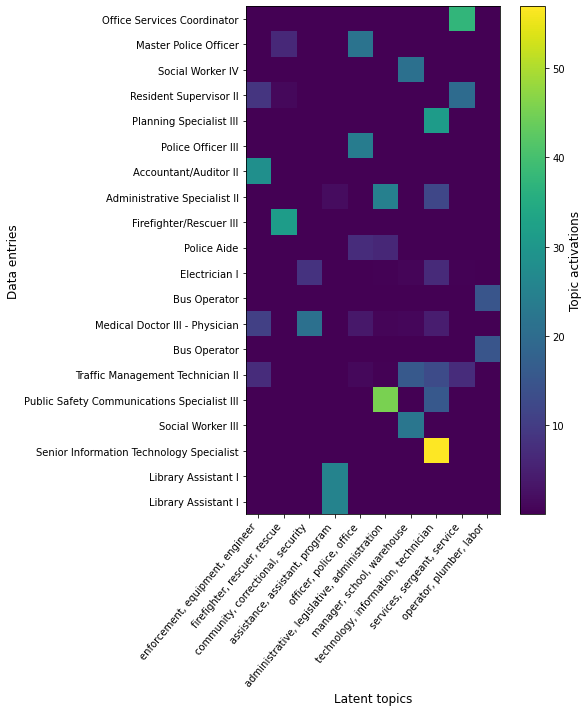

In [16]:
import matplotlib.pyplot as plt
encoded_labels = enc.transform(X_dirty[:20])
plt.figure(figsize=(8,10))
plt.imshow(encoded_labels)
plt.xlabel('Latent topics', size=12)
plt.xticks(range(0, 10), labels=topic_labels, rotation=50, ha='right')
plt.ylabel('Data entries', size=12)
plt.yticks(range(0, 20), labels=X_dirty[:20])
plt.colorbar().set_label(label='Topic activations', size=12)
plt.tight_layout()
plt.show()